In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [13]:
# Read the CSV file from the URL
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

# Display the DataFrame
print(df)
df

             uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  stars  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...    4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...    4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...    4.6     1881   
...                                                    ...    ...      ...   
2443646  Motorbike Armour, Motorbike Clothing, Cycling ...    0.0    

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [14]:
# Create a crosstab between category and isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Add a column for the proportion of best-sellers in each category
#crosstab['proportion_best_sellers'] = crosstab / (crosstab[0] + crosstab)

# Sort categories by the proportion of best-sellers in descending order
#sorted_crosstab = crosstab.sort_values(by='isBestSeller', ascending=False)

# Calculate the proportion of best-sellers for each category
category_proportions = df.groupby('category')['isBestSeller'].mean()

# Sort the categories by the proportion in descending order
sorted_categories = category_proportions.sort_values(ascending=False)

print(sorted_categories)

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: isBestSeller, Length: 296, dtype: float64


In [15]:
from scipy.stats import chi2_contingency
import numpy as np

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab.iloc[:, :2])  # Exclude the proportion column

print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Compute Cramér's V
n = crosstab.values.sum()  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

print(f"Cramér's V: {cramers_v}")

Chi-square Statistic: 36540.20270061387
P-value: 0.0
Degrees of Freedom: 295
Cramér's V: 0.1222829439760564


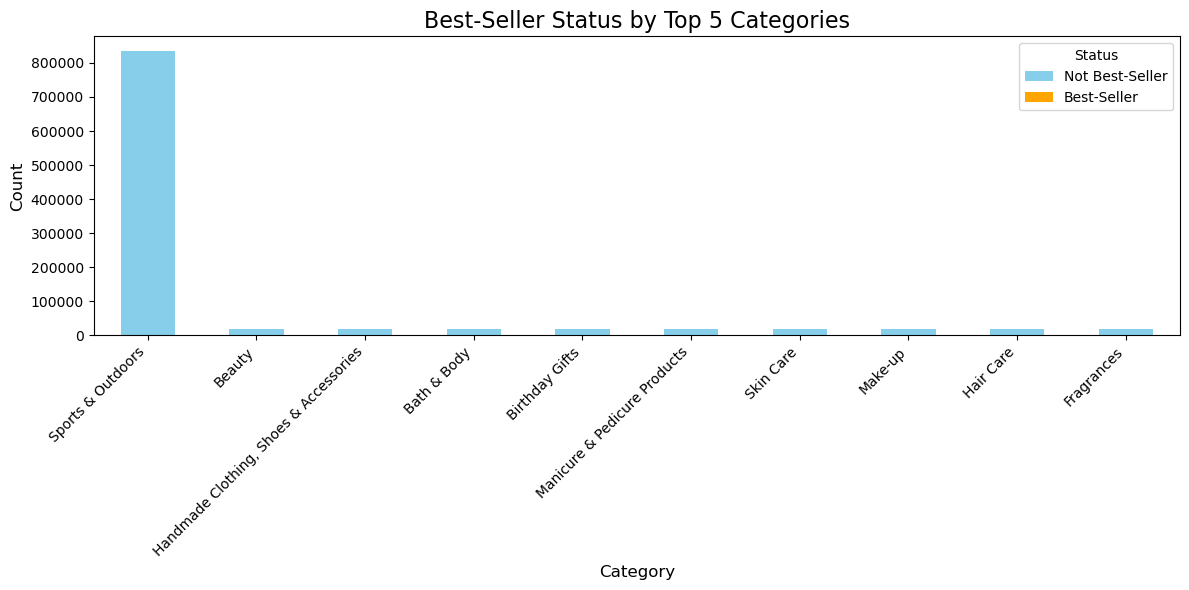

In [16]:
# Select the top 5 categories based on the count of best-sellers
top_categories = crosstab.sum(axis=1).nlargest(10).index
top_crosstab = crosstab.loc[top_categories]

# Plot a stacked bar chart for the top 5 categories
top_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'])

# Customize the plot
plt.title('Best-Seller Status by Top 5 Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['Not Best-Seller', 'Best-Seller'], title='Status')
plt.tight_layout()
plt.show()

In [17]:
# Assuming `df` is your DataFrame containing the product data
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


C:\Users\umehc\AppData\Local\Temp\ipykernel_8316\277890133.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='category', y='price', palette='muted')


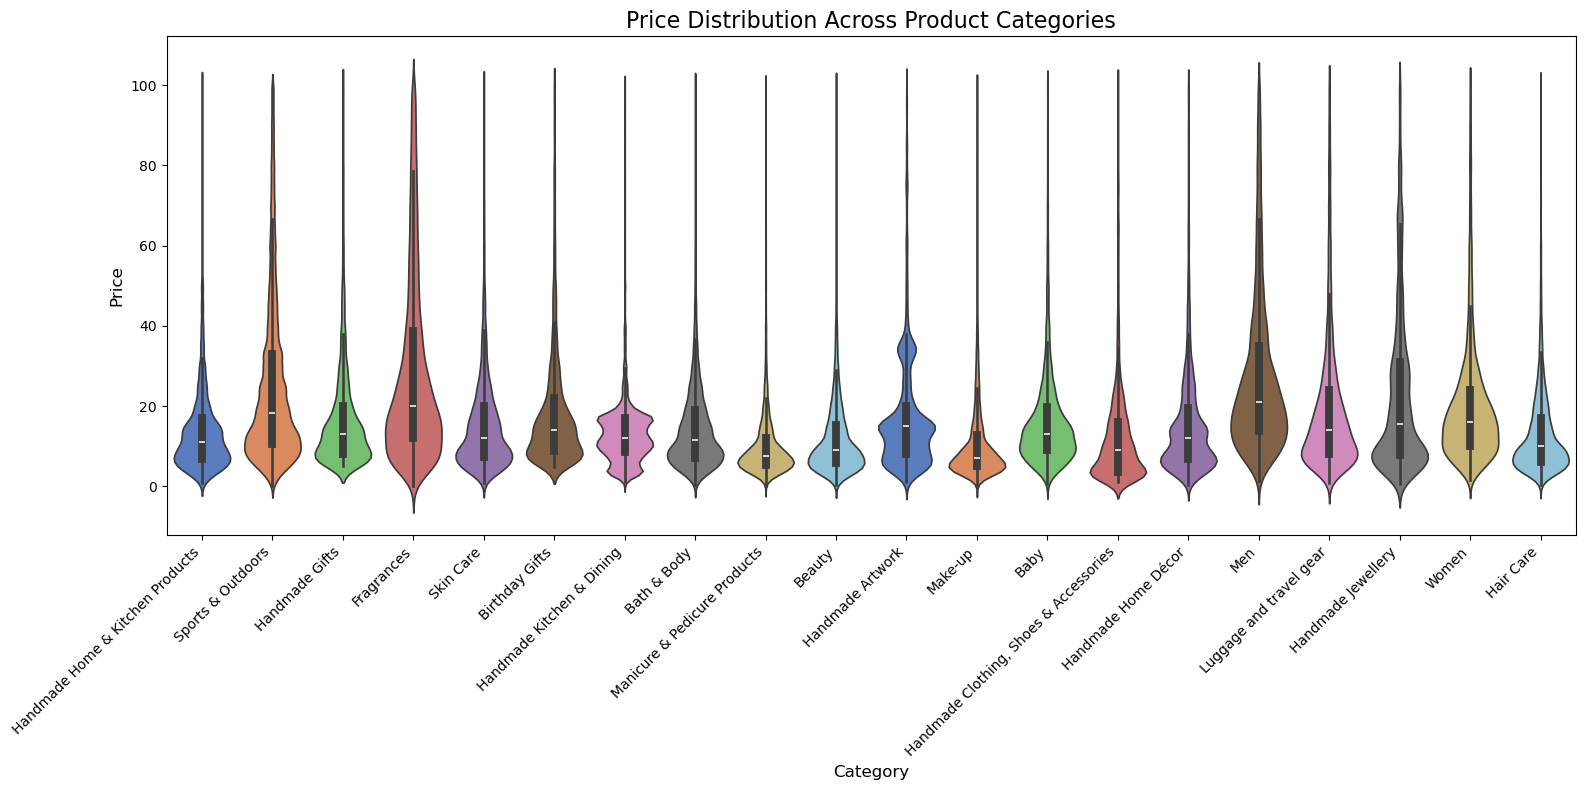

In [18]:
# Filter the top 20 categories based on count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
filtered_df = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Create a violin plot
plt.figure(figsize=(16, 8))
sns.violinplot(data=filtered_df, x='category', y='price', palette='muted')
plt.title('Price Distribution Across Product Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

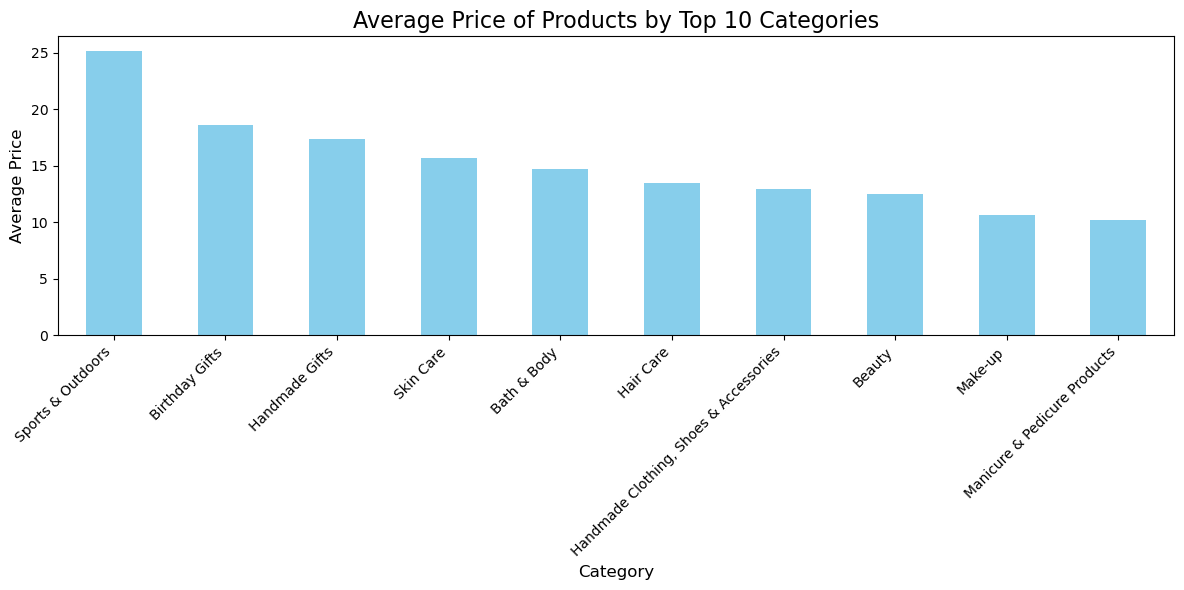

In [19]:
# Calculate the average price for each category
avg_price_per_category = df_no_outliers.groupby('category')['price'].mean()

# Filter the top 10 categories based on count
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
avg_price_top_10 = avg_price_per_category.loc[top_10_categories]

# Create a bar chart
plt.figure(figsize=(12, 6))
avg_price_top_10.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Price of Products by Top 10 Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\umehc\AppData\Local\Temp\ipykernel_8316\3836859464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df_ratings, x ='category', y ='stars', palette='muted')


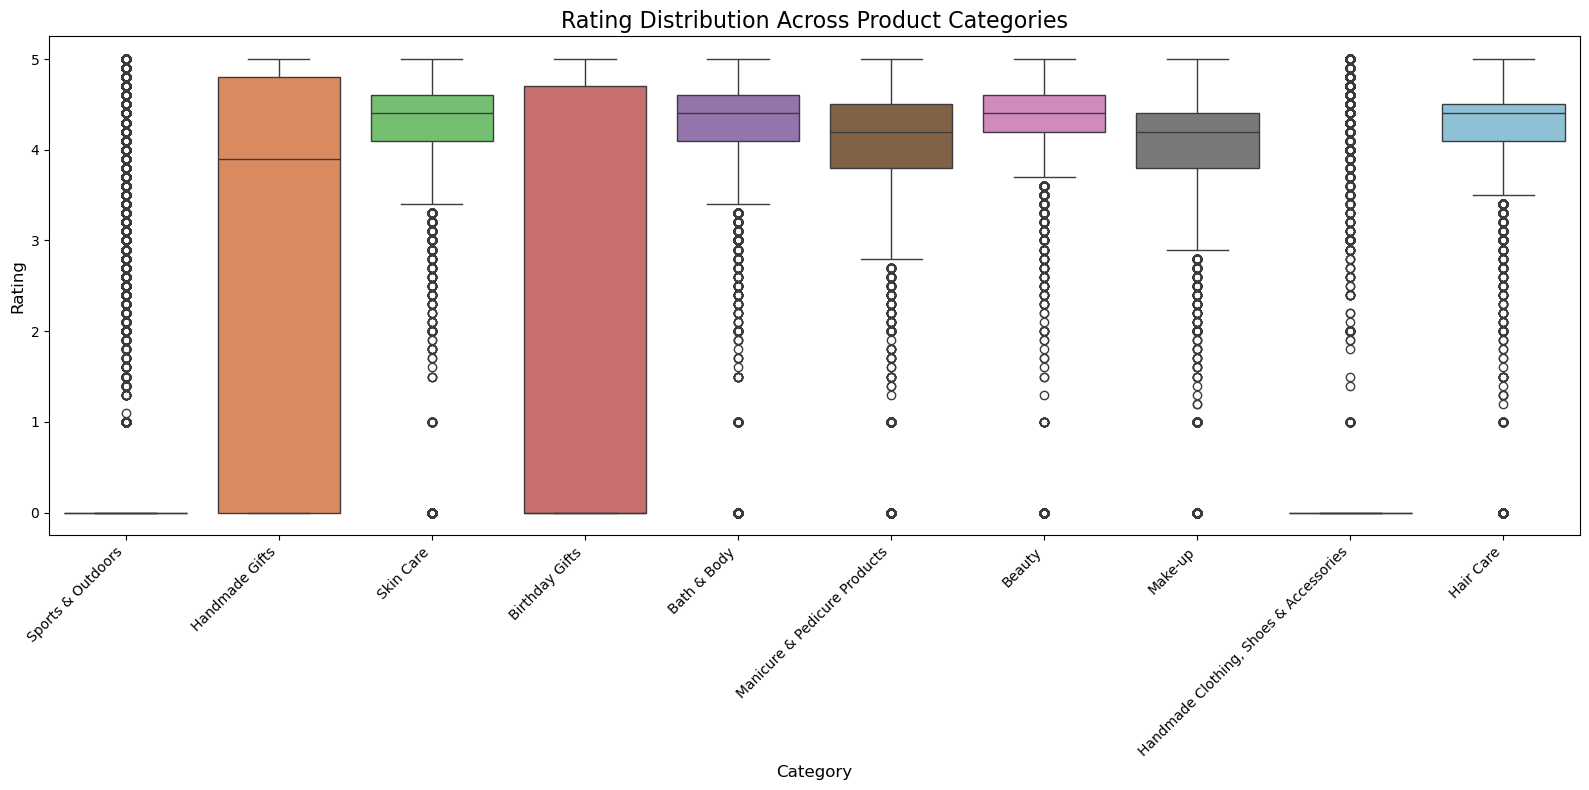

In [20]:
# Filter the top 10 categories based on count
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
filtered_df_ratings = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Create side-by-side box plots
plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_df_ratings, x ='category', y ='stars', palette='muted')
plt.title('Rating Distribution Across Product Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
from scipy.stats import pearsonr
# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(df['price'], df['stars'])

print(f"Correlation Coefficient between Price and Stars: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2e}")

# Interpretation:
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation Coefficient between Price and Stars: -0.12
P-value: 0.00e+00
The correlation is statistically significant.


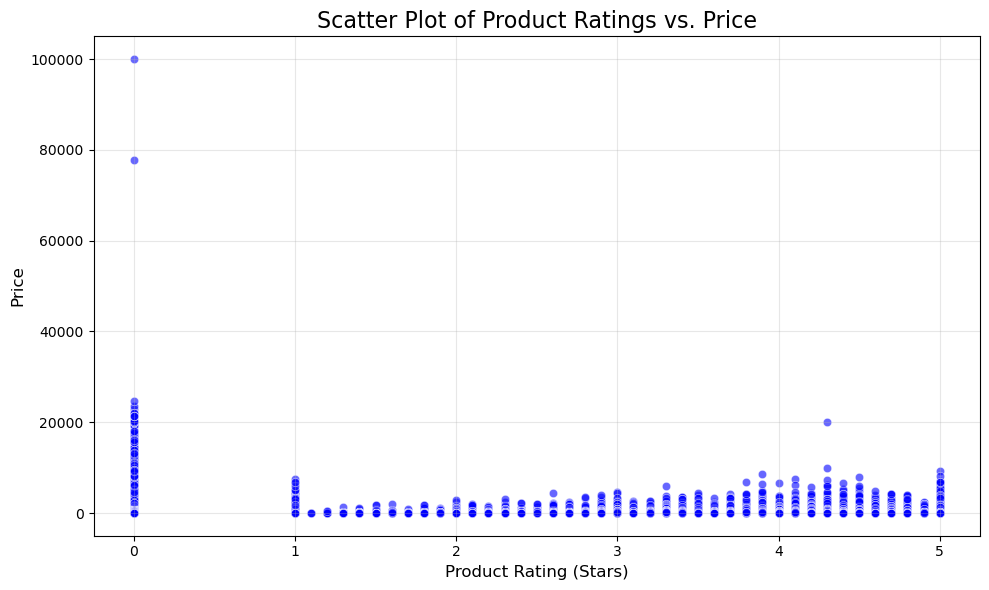

In [22]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stars', y='price', alpha=0.6, color='blue')
plt.title('Scatter Plot of Product Ratings vs. Price', fontsize=16)
plt.xlabel('Product Rating (Stars)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

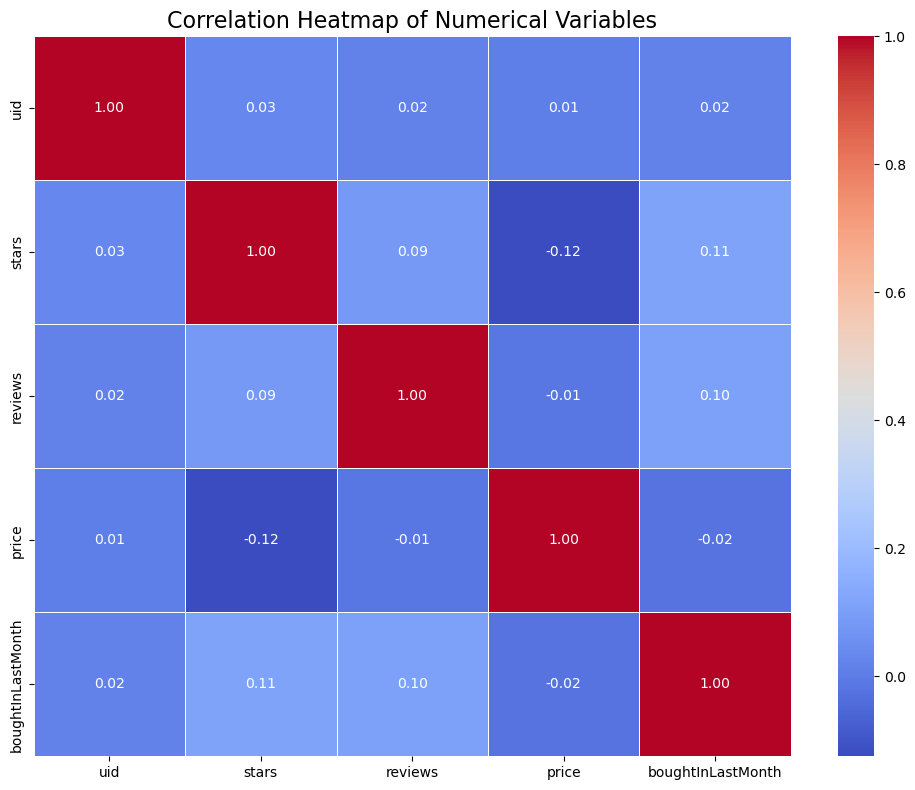

In [23]:

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['category'], drop_first=True)

# Select only numerical columns for correlation
numerical_df = df_encoded.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

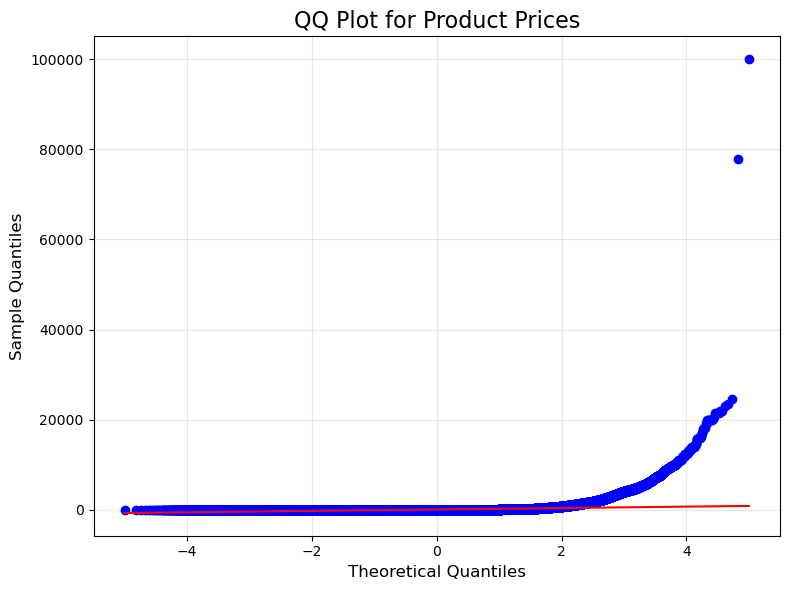

In [24]:
import scipy.stats as stats

# QQ plot for product prices
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()